In [58]:
import pandas as pd
import os
from kaggle.api.kaggle_api_extended import KaggleApi

In [59]:
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset = 'altavish/boston-housing-dataset'
down_dir = r"D://Sumon//Coding//Projects"
api.dataset_download_files(dataset, path=down_dir, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/altavish/boston-housing-dataset


In [60]:
def load_data():
    csv_path = os.path.join(down_dir, "HousingData.csv")
    return pd.read_csv(csv_path)

In [61]:
housing = load_data()
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [62]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [63]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


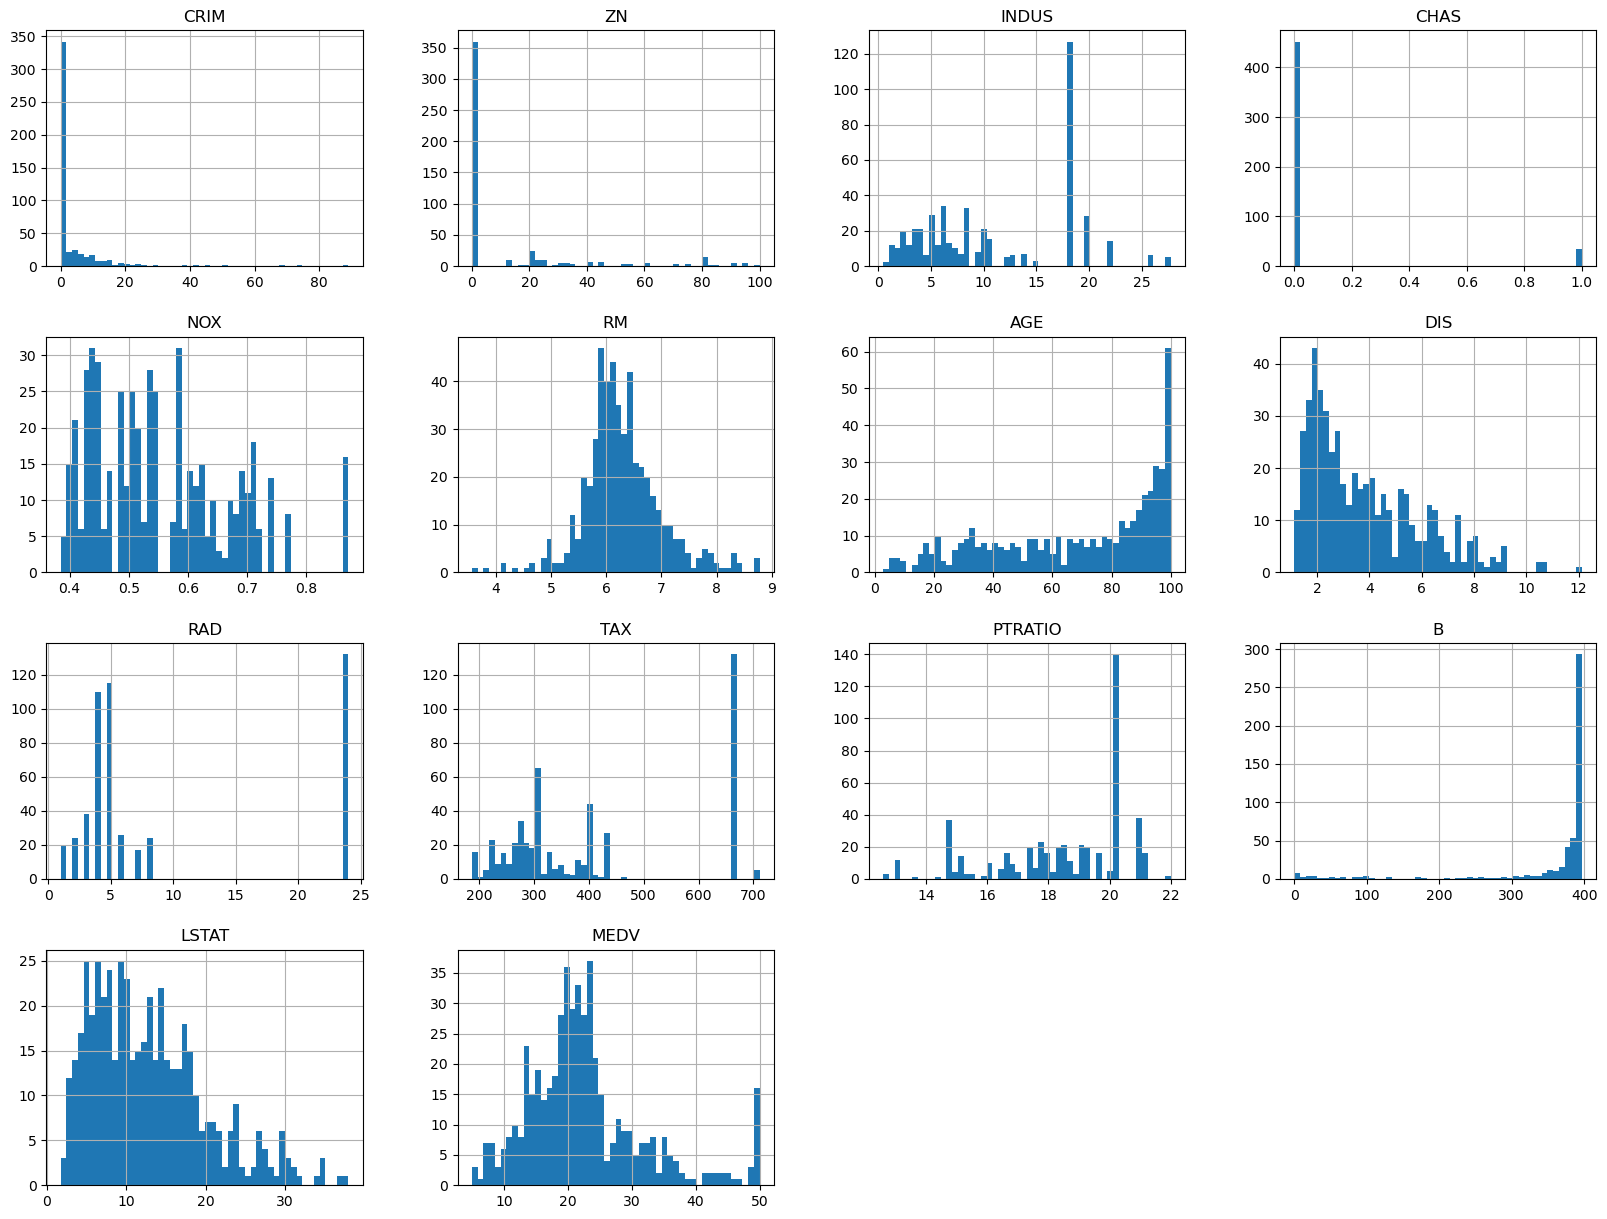

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [65]:
from zlib import crc32
import numpy as np
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [66]:
housing.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

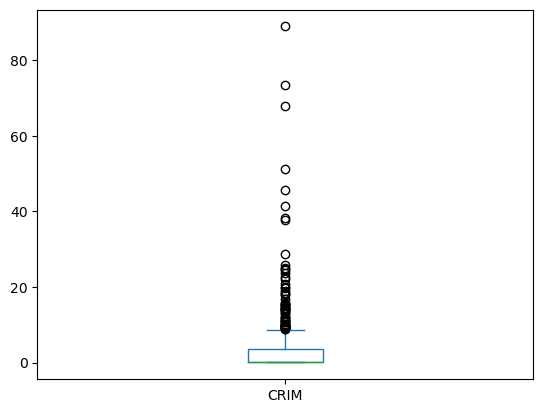

In [67]:
housing["CRIM"].plot(kind="box")
plt.show()

In [68]:
housing.columns[housing.isnull().any()]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], dtype='object')

In [69]:
fill_values = {
    "CRIM": housing["CRIM"].median(),
    "INDUS": housing["INDUS"].mean(),
    "ZN": housing["ZN"].mean(),
    "CHAS": housing["CHAS"].mode()[0],
    "AGE": housing["AGE"].median(),
    "LSTAT": housing["LSTAT"].median()
}
housing.fillna(value=fill_values, inplace=True)

In [70]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [71]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [73]:
strat_test_set["CHAS"].value_counts() / len(strat_test_set)

CHAS
0.0    0.931373
1.0    0.068627
Name: count, dtype: float64

In [74]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("CHAS", axis=1, inplace=True)

In [75]:
housing = strat_train_set.copy()

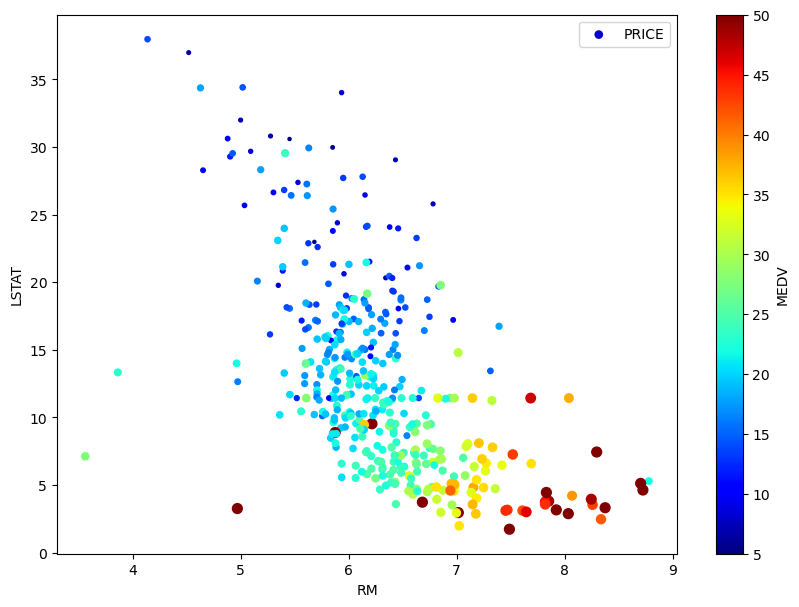

In [76]:
housing.plot(kind="scatter", x="RM", y="LSTAT", alpha=1,
             s=housing["MEDV"], label="PRICE",
             figsize=(10,7), c="MEDV", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

In [77]:
corr_matrix = housing.select_dtypes(include=["float64", "int64"]).corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.669448
ZN         0.382654
B          0.352618
DIS        0.255649
RAD       -0.365016
CRIM      -0.375934
AGE       -0.402325
NOX       -0.436721
TAX       -0.455906
PTRATIO   -0.463827
INDUS     -0.488724
LSTAT     -0.716792
Name: MEDV, dtype: float64

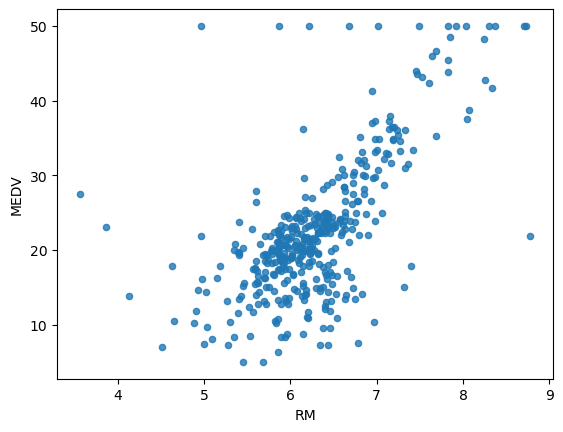

In [78]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)
plt.show()

In [79]:
medv_cap = 50
housing=housing[housing["MEDV"]<medv_cap]

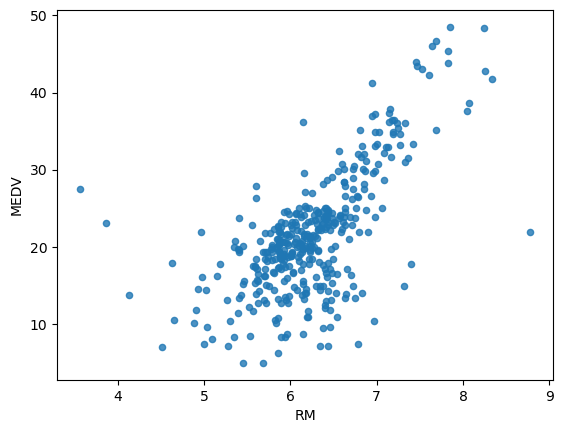

In [80]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)
plt.show()

In [81]:
housing = housing.copy()

housing.loc[:, 'RM_LSTAT'] = housing['RM'] * housing['LSTAT']
housing.loc[:, 'RM_squared'] = housing['RM'] ** 2
housing.loc[:, 'LSTAT_squared'] = housing['LSTAT'] ** 2
housing.loc[:, 'RM_to_LSTAT'] = housing['RM'] / housing['LSTAT']
housing.loc[:, 'CRIM_to_TAX'] = housing['CRIM'] / housing['TAX']
housing.loc[:, 'log_CRIM'] = np.log(housing['CRIM'] + 1)
housing.loc[:, 'RM_bin'] = pd.cut(housing['RM'], bins=5, labels=False)
housing.loc[:, 'SOCIO_ECON'] = housing['LSTAT'] + housing['DIS']


In [82]:
corr_matrix = housing.select_dtypes(include=["float64", "int64"]).corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV             1.000000
RM_to_LSTAT      0.783184
RM_squared       0.689873
RM               0.667745
RM_bin           0.640769
ZN               0.432674
B                0.386150
DIS              0.383212
CRIM            -0.434238
CRIM_to_TAX     -0.437756
RAD             -0.474439
PTRATIO         -0.484482
AGE             -0.507494
NOX             -0.538474
log_CRIM        -0.564610
TAX             -0.567710
INDUS           -0.598837
LSTAT_squared   -0.629398
SOCIO_ECON      -0.703306
RM_LSTAT        -0.721931
LSTAT           -0.735087
Name: MEDV, dtype: float64

In [83]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [84]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [85]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels)

LinearRegression()

In [86]:
predictions = lin_reg.predict(housing)
predictions

array([ 9.9342328 , 24.71739013, 28.99858291, 18.17094326, 18.59288306,
       18.14592199, 23.24162595, 18.10340689, 18.13516934, 30.50376687,
       18.28419266, 13.99637021, 15.12846206, 26.06902793,  9.76826169,
       20.47039883, 14.28346007, 33.13670411, 13.46302847, 31.94612213,
       28.84814623, 26.05846419, 19.68946653, 26.90239041, 29.36474361,
       38.54289453, 20.90531669, 35.15068587, 34.36118054, 27.29690956,
       25.97111413, 21.27750442, 14.93431702, 27.75501788, 23.25163223,
       22.85070616, 13.35127446, 30.82571642, 17.88018672, 20.01414881,
       14.5642692 ,  5.66893257, 11.41296351, 21.28067791, 22.67599542,
       23.91361775,  2.9106132 , 13.07203641, 31.20327341, 25.74164454,
       25.07301533, 28.86013289, 12.06522961,  4.43197043, 10.75702079,
       22.84652081, 17.74609448, 19.64342661, 19.28368665, 19.16789316,
       24.03942121, 25.28604748, 16.23479327, 20.17357595,  7.08382607,
       21.39828668, 17.47721581, 25.52839315, 33.33410735, 23.21

In [87]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(housing_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.998415788096118

In [88]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing, housing_labels)

DecisionTreeRegressor()

In [89]:
predictions = tree_reg.predict(housing)
tree_mse = mean_squared_error(housing_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [91]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [3.78095355 4.53979692 5.38765527 4.59249122 7.38926586 3.8471093
 5.13770377 5.33408849 5.00759423 4.65647399]
Mean: 4.9673132604302905
Standard deviation: 0.9638418158204808


In [92]:
lin_scores = cross_val_score(lin_reg, housing, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.49964415 4.78647646 5.14684738 3.73874544 8.54755845 3.68971975
 4.13646926 5.01026413 5.62268486 4.45129938]
Mean: 5.16297092551021
Standard deviation: 1.3920438797054946


In [94]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing, housing_labels)

RandomForestRegressor()

In [95]:
predictions = forest_reg.predict(housing)
forest_mse = mean_squared_error(housing_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.355480804141482

In [38]:
scores = cross_val_score(forest_reg, housing, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [5.10941261 4.28970095 2.80767513 3.19457663 6.36483789 3.27985168
 2.65149034 3.63608549 2.7381652  2.8641662 ]
Mean: 3.693596210323632
Standard deviation: 1.1571760876754176


In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [41]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [42]:
curves = grid_search.cv_results_
for mean_score, params in zip(curves["mean_test_score"], curves["params"]):
    print(np.sqrt(-mean_score), params)

5.234344683541385 {'max_features': 2, 'n_estimators': 3}
4.425415686341068 {'max_features': 2, 'n_estimators': 10}
4.059307566157887 {'max_features': 2, 'n_estimators': 30}
5.066352410657118 {'max_features': 4, 'n_estimators': 3}
3.884544457061714 {'max_features': 4, 'n_estimators': 10}
3.8630008362104213 {'max_features': 4, 'n_estimators': 30}
4.4577987487659545 {'max_features': 6, 'n_estimators': 3}
4.0012943634945595 {'max_features': 6, 'n_estimators': 10}
3.6589426486211134 {'max_features': 6, 'n_estimators': 30}
4.447592288024367 {'max_features': 8, 'n_estimators': 3}
4.166868886574335 {'max_features': 8, 'n_estimators': 10}
3.868127333066327 {'max_features': 8, 'n_estimators': 30}
4.672703389002047 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.051296338789766 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.5906578175171004 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.8357160766912424 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [43]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.064416  , 0.0088105 , 0.06193895, 0.06637952, 0.36143973,
       0.0161293 , 0.06770401, 0.01147747, 0.01921009, 0.02927391,
       0.01681945, 0.27640108])

In [54]:
fin_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

fin_predictions = fin_model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(housing_labels, fin_model.predict(housing)))
test_rmse = np.sqrt(mean_squared_error(y_test, fin_predictions))


In [55]:
train_rmse

1.4798100794653108

In [56]:
test_rmse

2.790472703413659